# EDA - Cleaned Ames Housing Data

Here I will explore the cleaned datasets for interesting relationships, correlations, etc. 

Data Visualization using pandas and Seaborn plots to look at data and identify potential attributes of interest to include in later modeling.

In [3]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

#https://stackoverflow.com/questions/66109829/pandas-df-isna-sum-not-showing-all-column-names
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

ames_test = pd.read_csv('../02_DATA/ames_test_clean.csv')
ames_train = pd.read_csv('../02_DATA/ames_train_clean.csv')

### Seaborn Heatmap

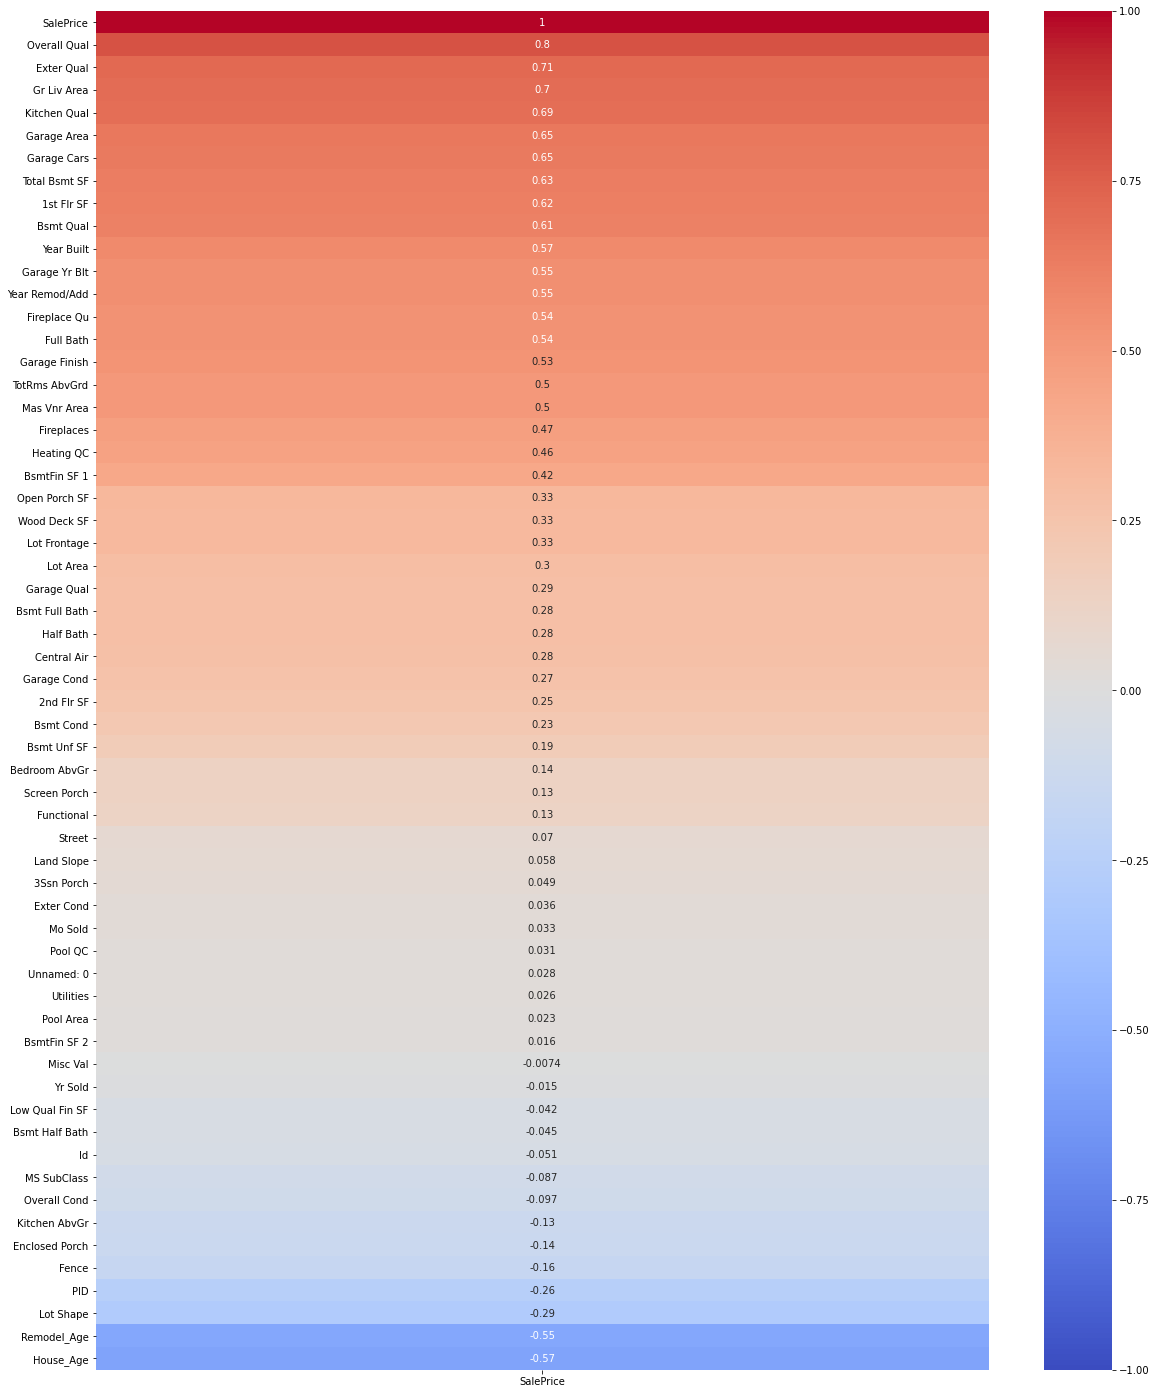

In [4]:
# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
plt.figure(figsize=(20, 25))
sns.heatmap(ames_train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

#### Heatmap Figure Summary

***SalePrice Correlations:*** using Seaborn's Heatmap to visualize the relationships between variables, a few stand out. ***Overall Qual***, ***Exter Qual***, ***Gr Liv Area***, and ***Kitchen Qual*** are all heavily (positively) correlated with high sales values. The strongest Negative correlations were ***House_Age***, ***Remodel_Age***, and ***Lot Shape*** (with a lower SalePrice correlated with an increasingly 'regularly' shaped lot). 

Interestingly, the year a house was built appears slightly more strongly correlated with a high sale price than the year a house was remodeled, suggesting that newly built houses are more valuable than even recently remodeled older homes. 

---


# Distributions

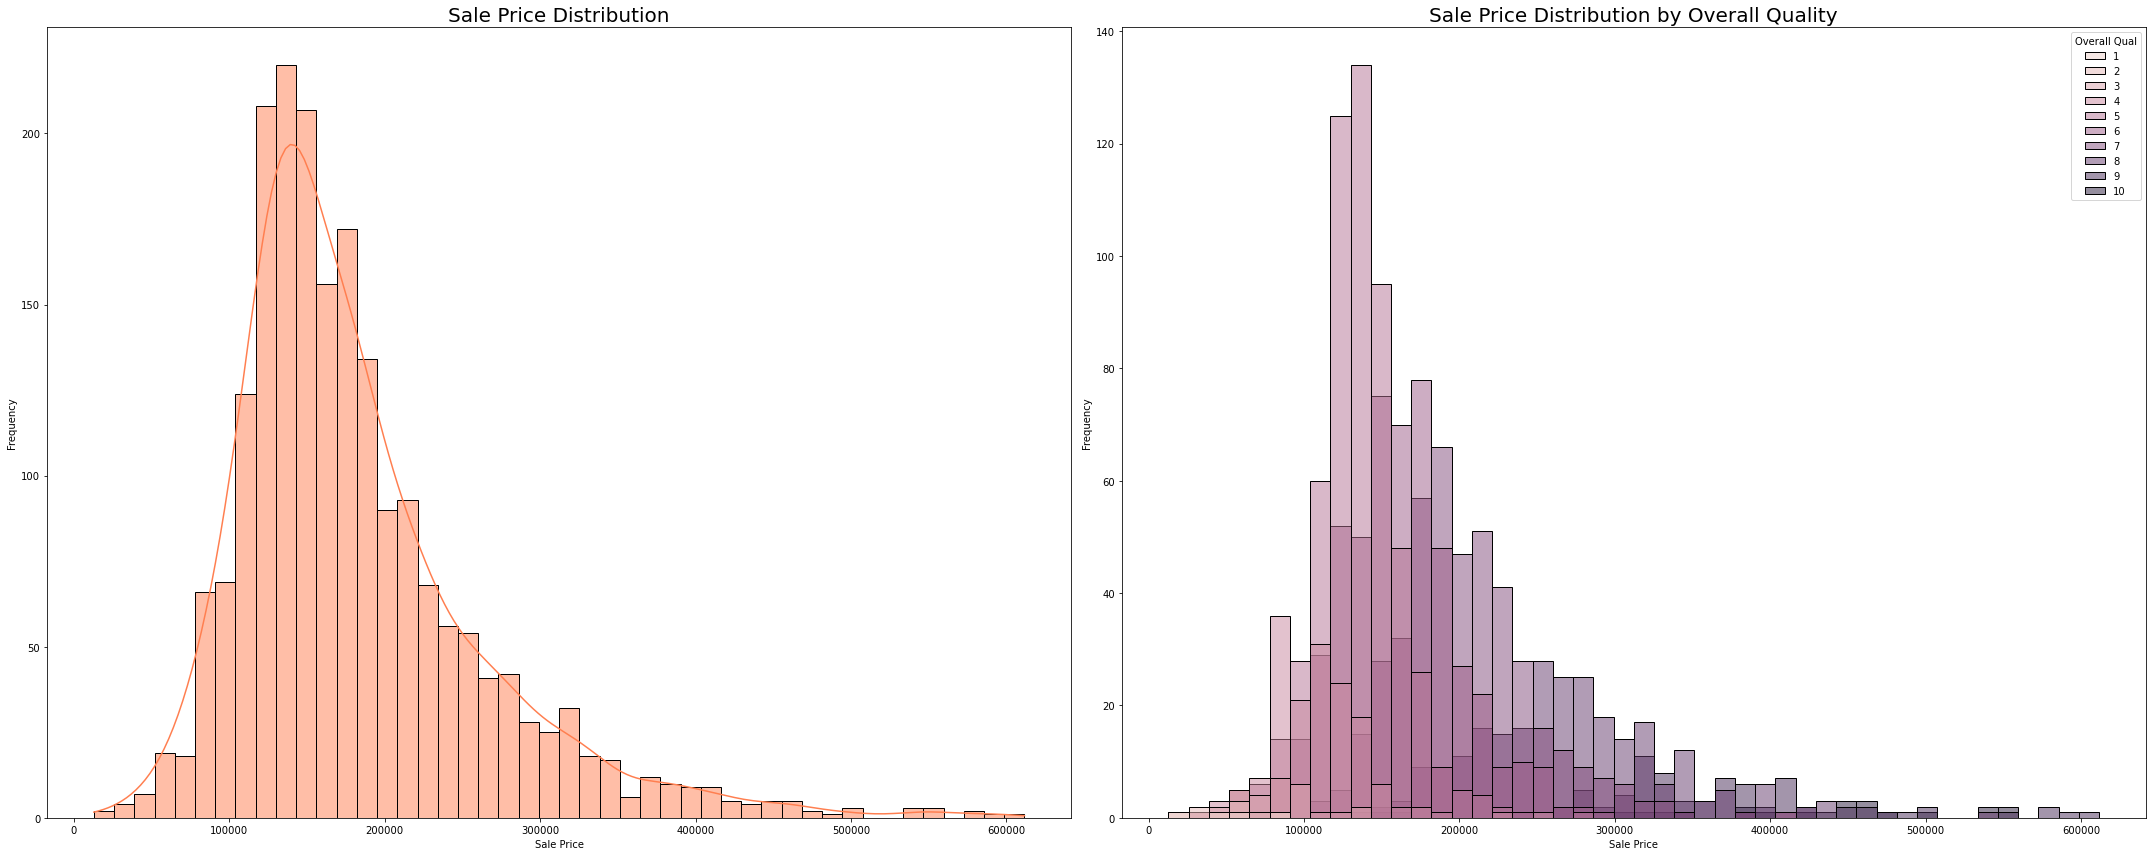

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(30, 12))
sns.histplot(ames_train['SalePrice'], color='coral', kde=True, ax=ax[0])
ax[0].set_title('Sale Price Distribution', fontdict={'fontsize': 20})
ax[0].set_xlabel('Sale Price')
ax[0].set_ylabel('Frequency')


sns.histplot(data=ames_train, x='SalePrice', hue='Overall Qual', ax=ax[1])
ax[1].set_title('Sale Price Distribution by Overall Quality', fontdict={'fontsize': 20})
ax[1].set_xlabel('Sale Price')
ax[1].set_ylabel('Frequency')

plt.tight_layout();

***Sale Price Distribution:*** You can clearly see that the sales prices are not normally distributed and demonstrate right skewness. This indicates something other than randomness or chance is affecting sale price. Further investigation is merited. 

Because the data are not normally distributed, a log transformation of the target (SalePrice) might be considered.

---


### Scatterplots!

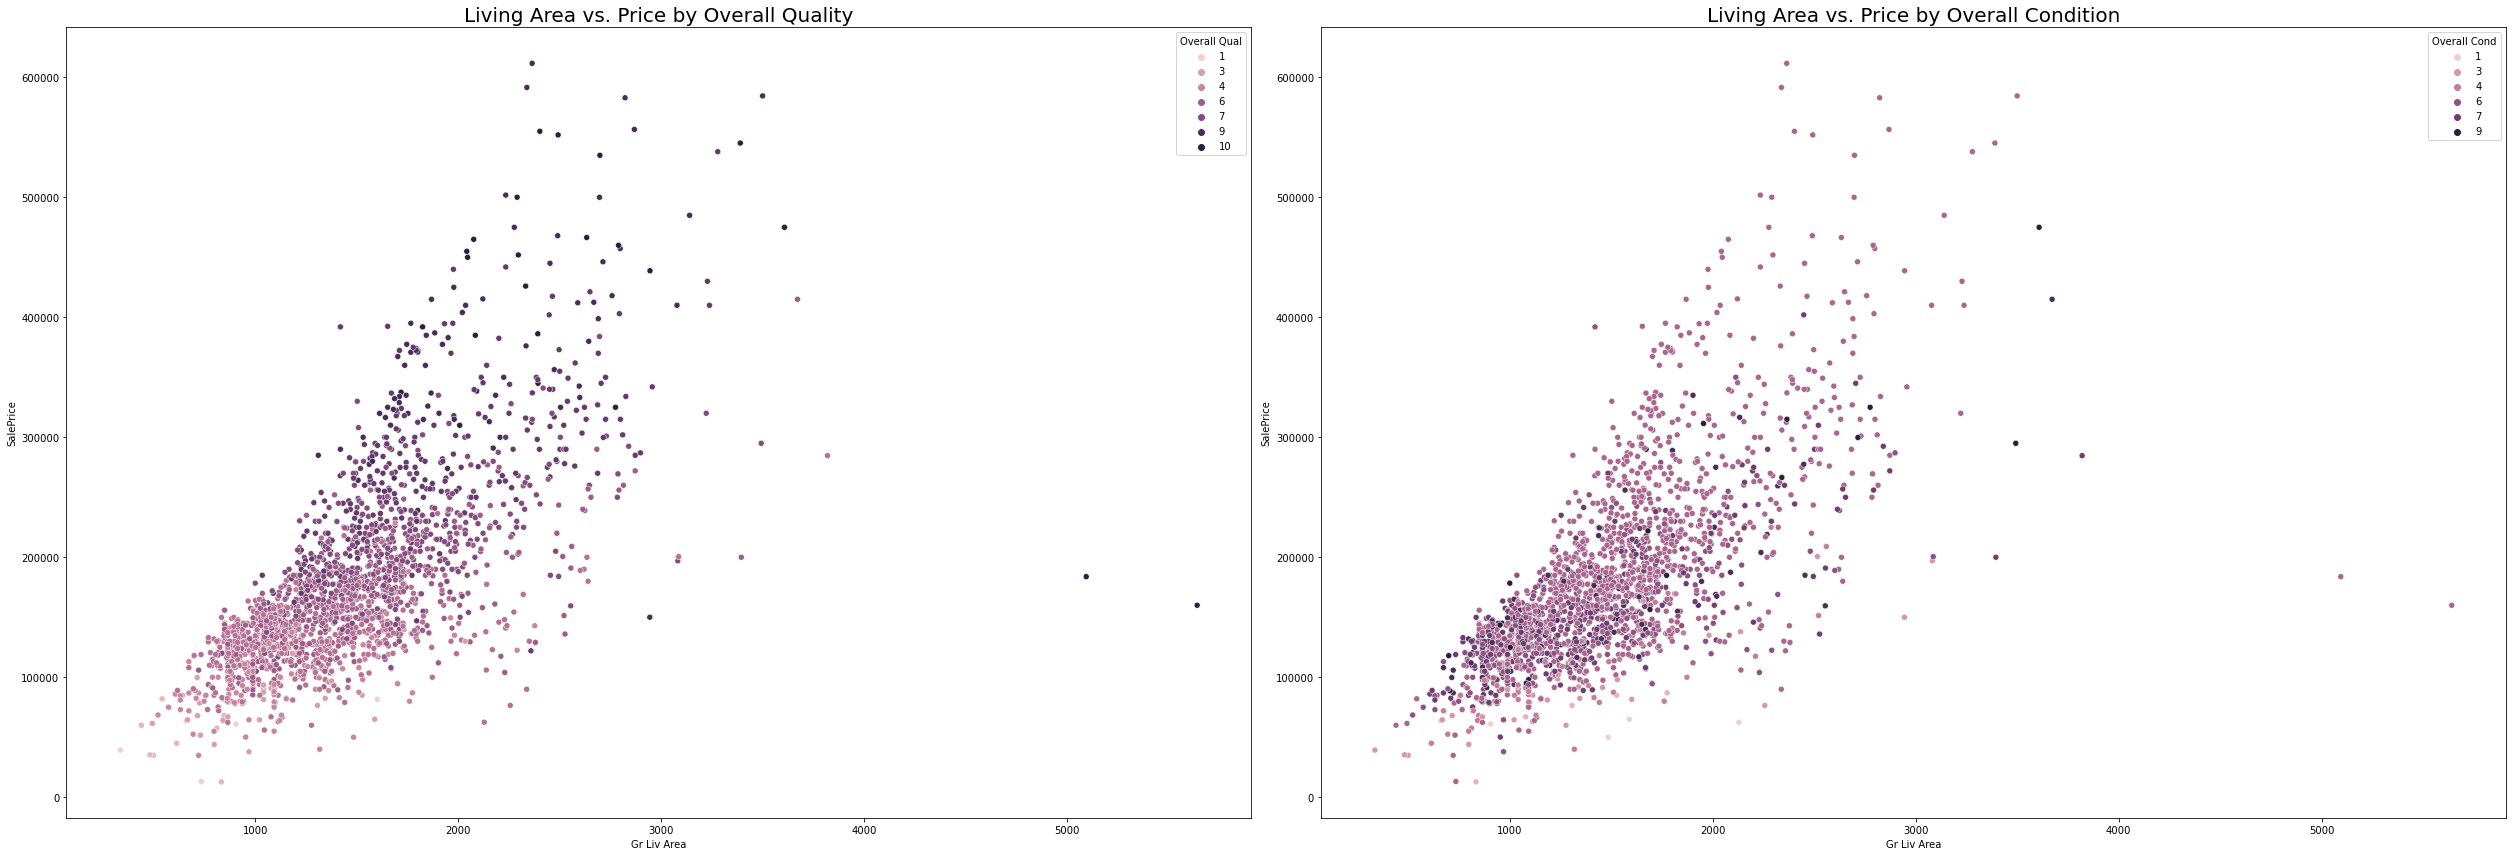

In [16]:
# a bunch of scatterplots to look at the data from different ways 
fig, ax = plt.subplots(1, 2, figsize=(35, 12))
sns.scatterplot(data=ames_train, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', ax=ax[0])
ax[0].set_title('Living Area vs. Price by Overall Quality', fontdict={'fontsize': 20})

sns.scatterplot(data=ames_train, x='Gr Liv Area', y='SalePrice', hue='Overall Cond', ax=ax[1])
ax[1].set_title('Living Area vs. Price by Overall Condition', fontdict={'fontsize': 20})

plt.tight_layout();


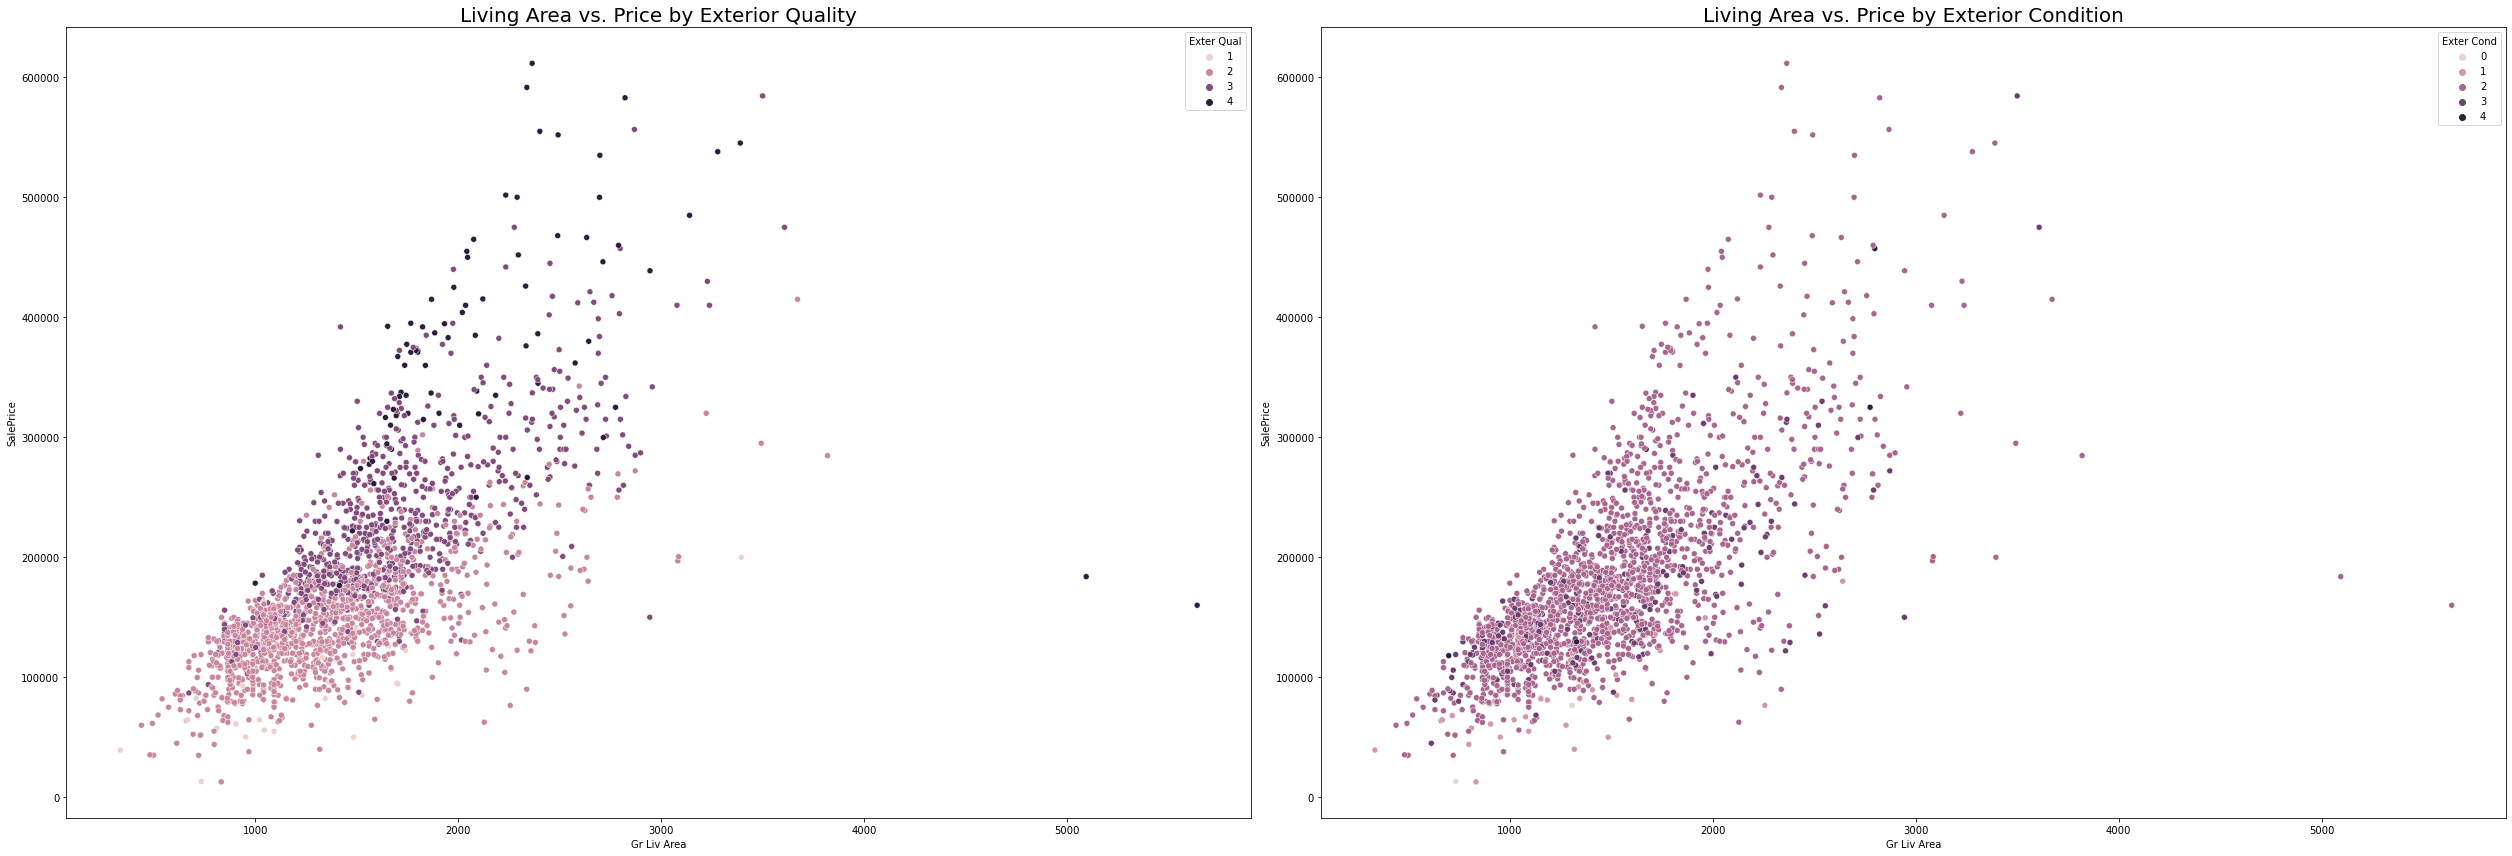

In [17]:
# a bunch of scatterplots to look at the data from different ways 
fig, ax = plt.subplots(1, 2, figsize=(35, 12))

sns.scatterplot(data=ames_train, x='Gr Liv Area', y='SalePrice', hue='Exter Qual', ax=ax[0])
ax[0].set_title('Living Area vs. Price by Exterior Quality', fontdict={'fontsize': 20})

sns.scatterplot(data=ames_train, x='Gr Liv Area', y='SalePrice', hue='Exter Cond', ax=ax[1])
ax[1].set_title('Living Area vs. Price by Exterior Condition', fontdict={'fontsize': 20})
plt.tight_layout();


**Living Area and Overall/Exterior Quality & Condition Scatterplots**: Here I tried to see if there was any significant difference between how Qual or Cond variables might signify another intersection. 

Overall Qual, Exter Qual, and Gr. Living Area had clear strong correlations. These variables will likely be important, and might warrant their own combination of features. 



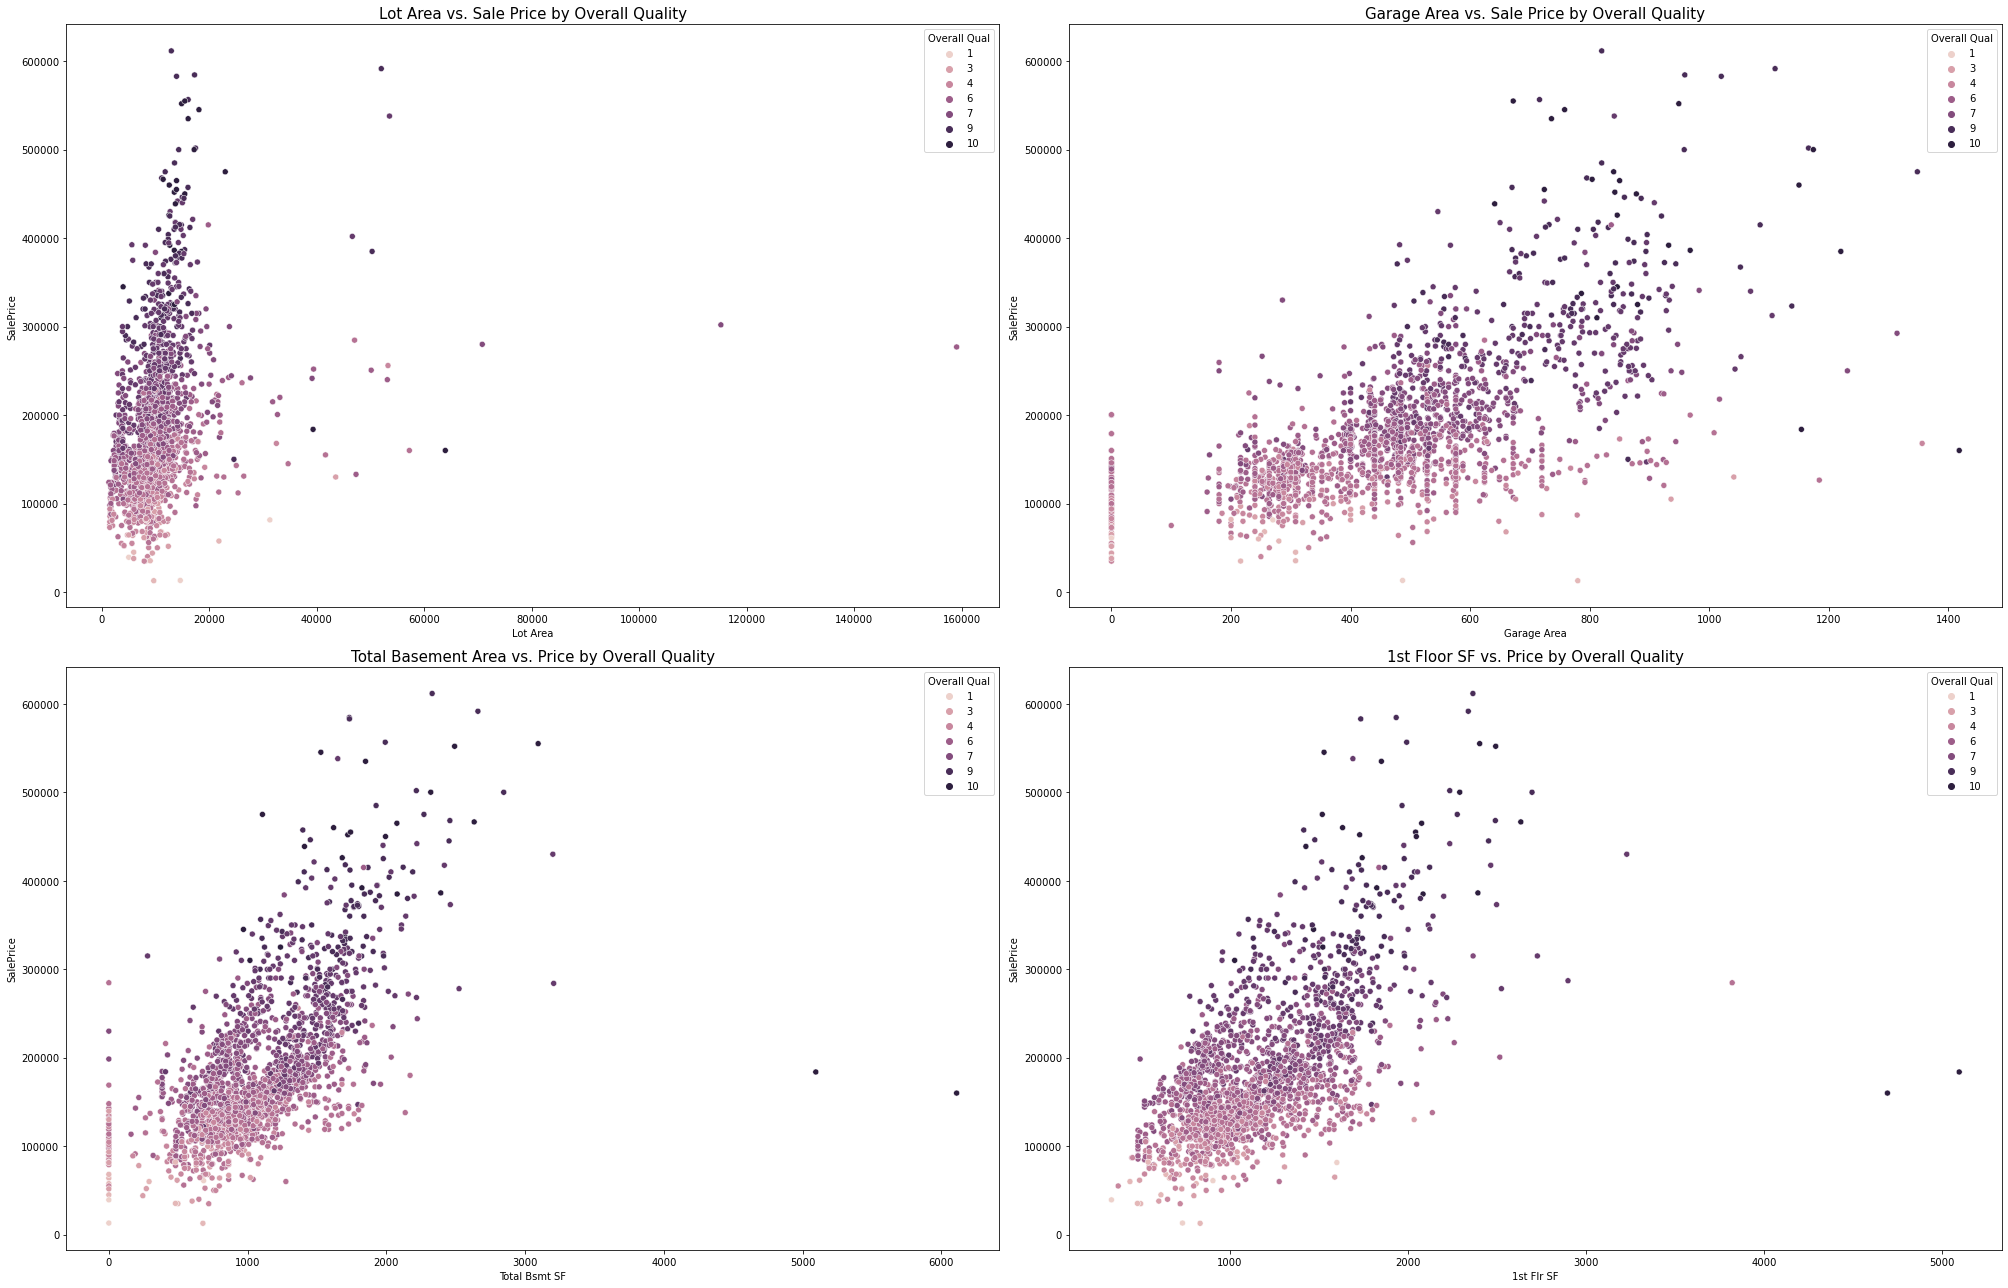

In [23]:
# Sale Price vs other vars
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(28, 18))
sns.scatterplot(data=ames_train, x='Lot Area', y='SalePrice', hue='Overall Qual', ax=ax[0][0]) # outliers over 100000
ax[0][0].set_title('Lot Area vs. Sale Price by Overall Quality', fontdict={'fontsize': 15})

sns.scatterplot(data=ames_train, x='Garage Area', y='SalePrice', hue='Overall Qual', ax=ax[0][1]) # no outliers
ax[0][1].set_title('Garage Area vs. Sale Price by Overall Quality', fontdict={'fontsize': 15})

sns.scatterplot(data=ames_train, x='Total Bsmt SF', y='SalePrice', hue='Overall Qual', ax=ax[1][0]) # outliers over 5000
ax[1][0].set_title('Total Basement Area vs. Price by Overall Quality', fontdict={'fontsize': 15})

sns.scatterplot(data=ames_train, x='1st Flr SF', y='SalePrice', hue='Overall Qual', ax=ax[1][1]) # outliers over 3500
ax[1][1].set_title('1st Floor SF vs. Price by Overall Quality', fontdict={'fontsize': 15})

plt.tight_layout();


There are outliers in several categories (based on the scatter plots). These are eligible to be dropped later to improve model performance.

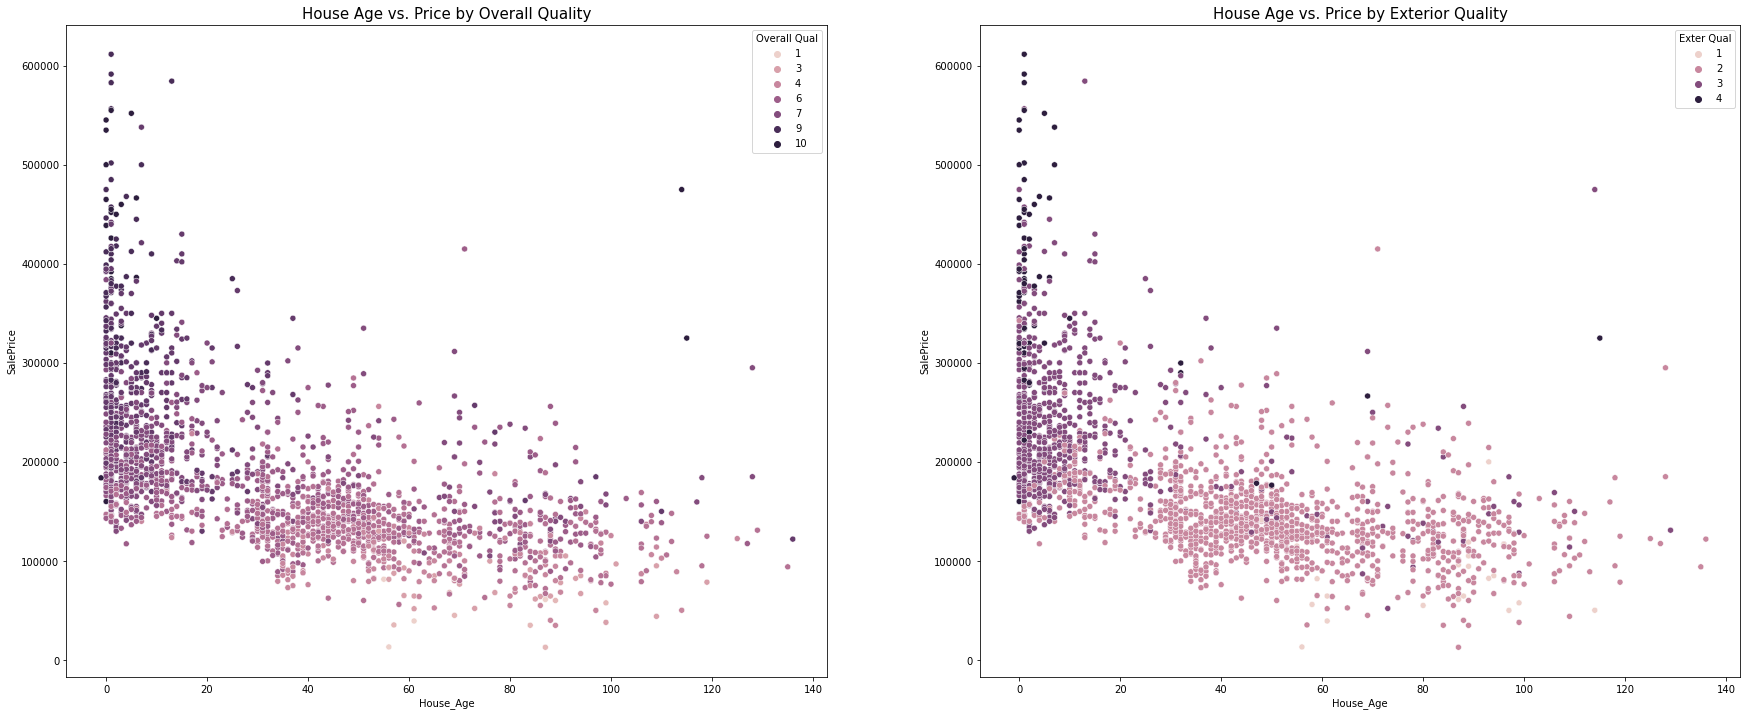

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 12))
sns.scatterplot(data=ames_train, x='House_Age', y='SalePrice', hue='Overall Qual', ax=ax[0])
ax[0].set_title('House Age vs. Price by Overall Quality', fontdict={'fontsize': 15})

sns.scatterplot(data=ames_train, x='House_Age', y='SalePrice', hue='Exter Qual', ax=ax[1])
ax[1].set_title('House Age vs. Price by Exterior Quality', fontdict={'fontsize': 15});
#plt.tight_layout(); 

**House Age and Sale Price by Overall/Exter Qual**: We see that much older houses typically sell for less and tend to be of middling or lower quality. However, the fact that a small handful 

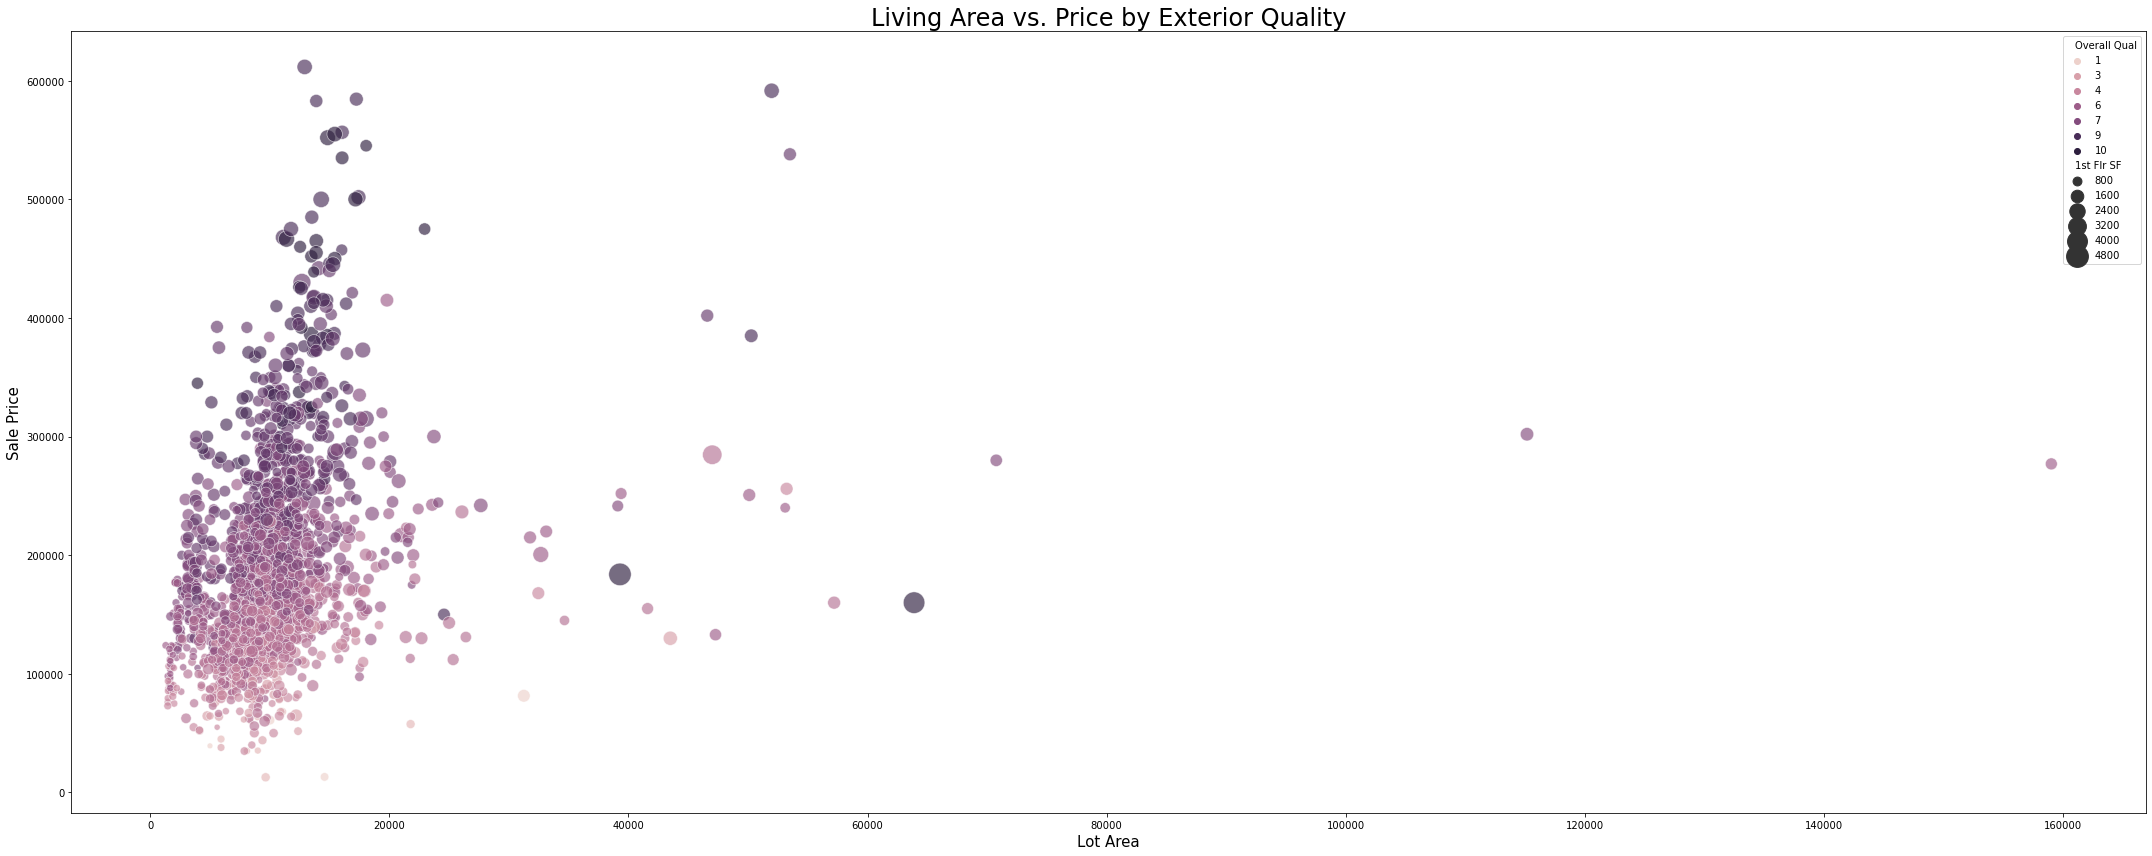

In [70]:
# setting min/max sizes for dots to createvisual separation
minsize = min(ames_train['1st Flr SF']*0.099)
maxsize = max(ames_train['1st Flr SF']*0.099)

fig, ax = plt.subplots(1, 1, figsize=(30, 12))


sns.scatterplot(data=ames_train, x='Lot Area', y='SalePrice', hue='Overall Qual', size = '1st Flr SF', sizes=(minsize, maxsize), alpha=0.65, ax=ax)
ax.set_title('Living Area vs. Price by Exterior Quality', fontdict={'fontsize': 24})
ax.set_xlabel('Lot Area', fontdict={'fontsize': 15})
ax.set_ylabel('Sale Price', fontdict={'fontsize': 15})

plt.tight_layout();

#### Multi-Dimensional Scatterplot Summary

This plot shows Lot Area vs Sale Price while also incorporating the Overall Quality and 1st Flr SF variables through the colors and sizes of the scattered points. 

The smallest, lightest dots are concentrated in the lower left of the graph. Moving up, we do see the largest points are fairly dark, but there are a handful of outliers. It seems that many of the homes in the ames dataset, regardless of sale price, are of a relatively similar lot size and quality. 

The higher priced homes generall appear to have larger 1st Floor SF, combined with the highest Overall Quality values even at lot sizes that are roughly average compared to the rest of the data. 

-- 

#### Other Misc. Plots

Lets try out some bar plots and box plots to see what we return. 

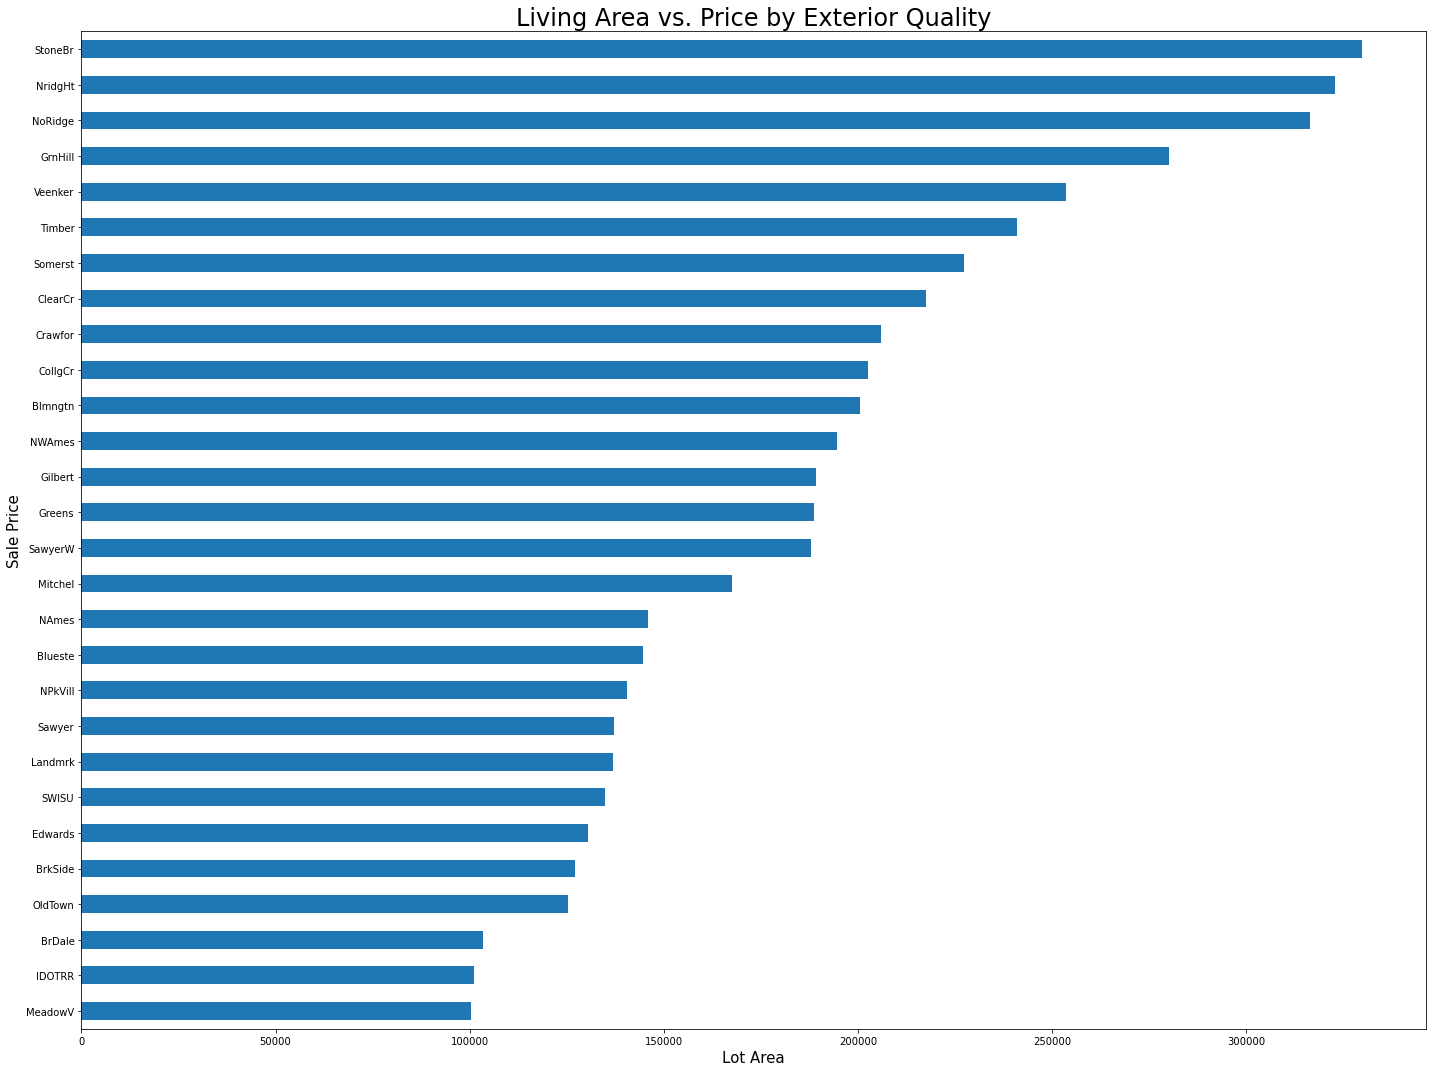

In [78]:
ames_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values().plot(kind='barh', title='Mean Sale Price by Neighborhood', xlabel='Mean Sale Price', figsize=(20, 15))
plt.title('Living Area vs. Price by Exterior Quality', fontdict={'fontsize': 24})
plt.xlabel('Lot Area', fontdict={'fontsize': 15})
plt.ylabel('Sale Price', fontdict={'fontsize': 15})

plt.tight_layout();

***Neighborhood Barchart:*** 
We see significant differences in average SalePrice between neighborhoods. Location will clearly be an important factor.

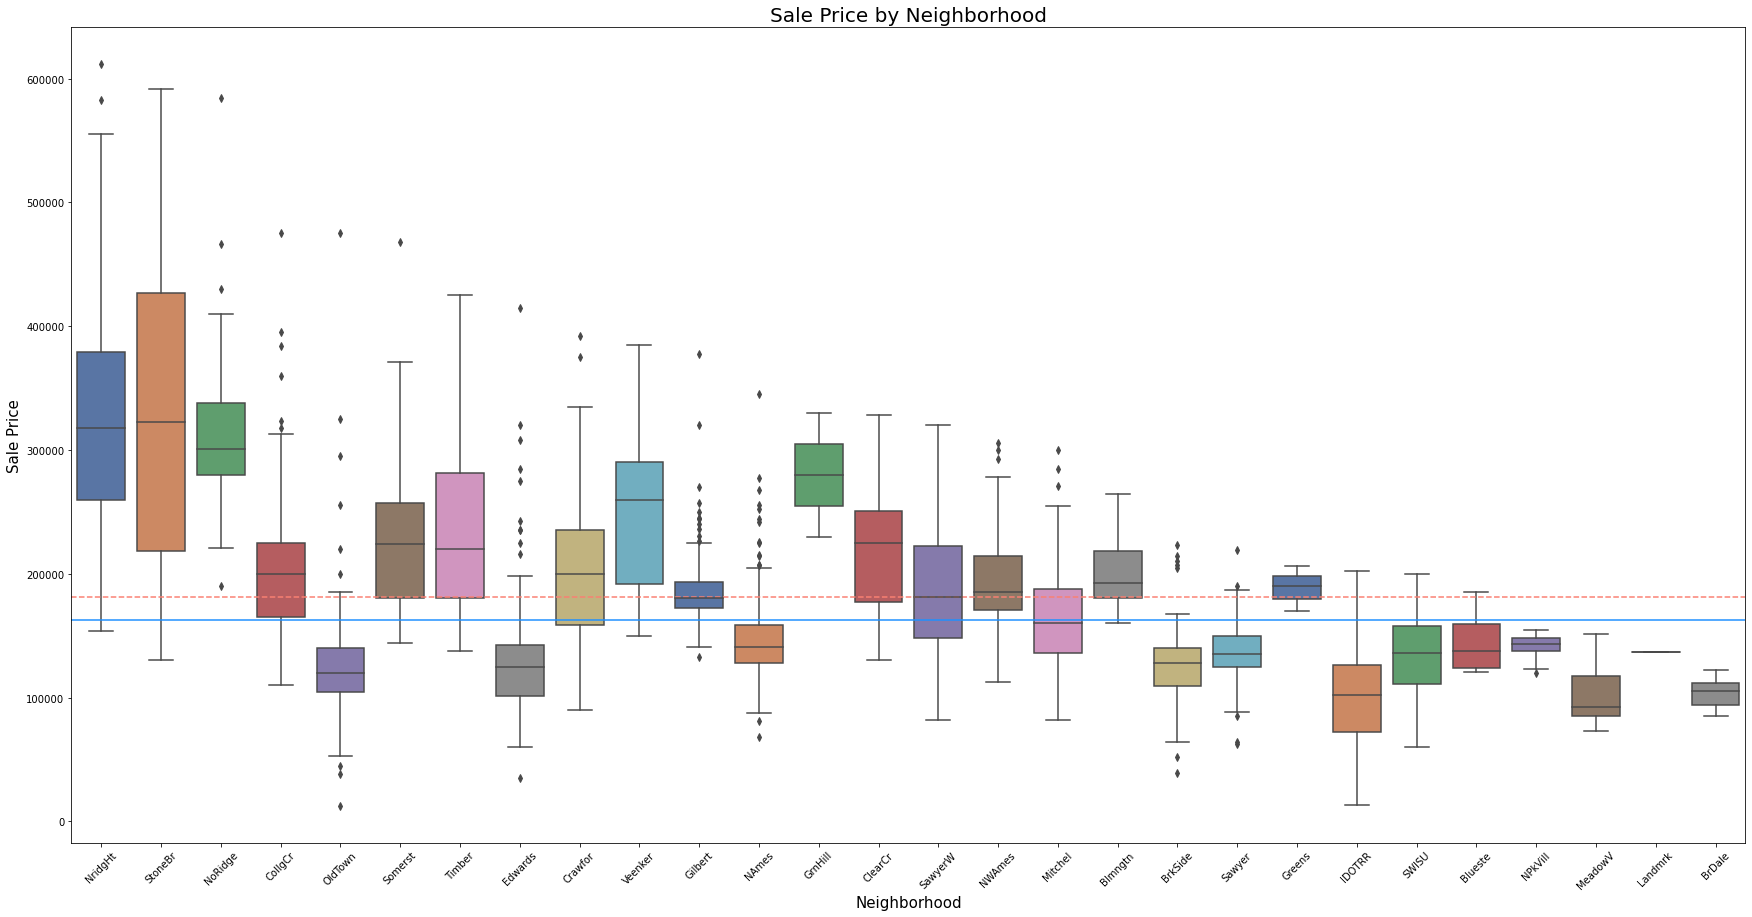

In [82]:
#boxplots of saleprice by neighborhood
# https://moonbooks.org/Articles/How-to-plot-horizontal-lines-with-matplotlib-/#dashed-lines
ames_sp_sorted = ames_train.sort_values(by='SalePrice', ascending=False)

fig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(data = ames_sp_sorted, x='Neighborhood', y='SalePrice', ax=ax, palette='deep')
plt.title('Sale Price by Neighborhood', fontdict={'fontsize':20})
plt.ylabel('Sale Price', fontdict={'fontsize':15})
plt.xlabel('Neighborhood', fontdict={'fontsize':15})
plt.xticks(rotation=45)
ax.axhline(y=np.mean(ames_train['SalePrice']),  linestyle="--", color='salmon')
ax.axhline(y=np.median(ames_train['SalePrice']), color='dodgerblue');

#### Neighborhood Boxplots

In this boxplot of SalePrice by neighborhood, we can clearly see that the neighborhood a home is sold in has a clear relationship to its Sale Price, with some selling significantly above the mean and median Sale Price, while other neighborhood's hoomes sell short of both mean and median sale prices. 

Neighborhood will likely be a variable of interest (OHE?) in the modeling phase of this project